In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

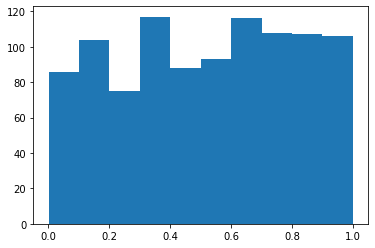

In [2]:
#Draw 1,000 sample from uniform distribution and plot it
x = np.random.uniform(0,1,1000)
plt.hist(x);


In [3]:
#define clicks with x<0.5
#calculate how many people will click
clicks = x<.5
n_clicks = sum(clicks)
f'Number of clicks is equal to {n_clicks}'

'Number of clicks is equal to 470'

In [4]:
#get the protion of clickers
f'Proportion who clicked = {n_clicks/len(clicks)}'

'Proportion who clicked = 0.47'

In [5]:
#read data set of finch beaks
df_12 = pd.read_csv('data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [6]:
lengths = df_12.blength

In [7]:
por = sum(lengths > 10)/ len(lengths)
por

0.8514056224899599

In [8]:
#resampling from data to get an approximation of the distribution
n_samples = 1000
sum(np.random.choice(lengths, n_samples, replace = True)>10)/ n_samples

0.862

In [9]:
#set a random seed for reproducibility
np.random.seed(42)

In [10]:
#simulate one run of flipping biased coin (p=0.7) 10 times (bernouli binomial)
np.random.binomial(1, 0.7, 10)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [11]:
#equaly we can have it as sum of 10 flipping biased coin (p=0.7) 10 times (bernouli binomial)
np.random.binomial(10, 0.7)

10

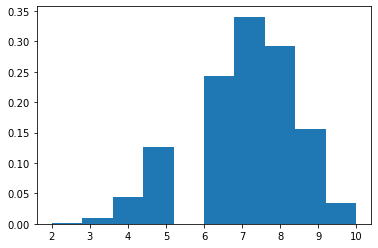

In [12]:
# now lets simulate this 10 runs for 10000 times
x = np.random.binomial(10, 0.7, 10_000)
plt.hist(x, 10, density=True);

In [13]:
# bar plot or histogram are not expressive enoughf
#lets go with cummulitive cdf 
def ecdf(data, plot=False):
    '''
    Compute ECDF for one-dimensional array of measurment.
    '''
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1, n+1)/n
    
    if plot:
        plt.plot(x, y, marker ='.', linestyle = 'none');
    return x, y

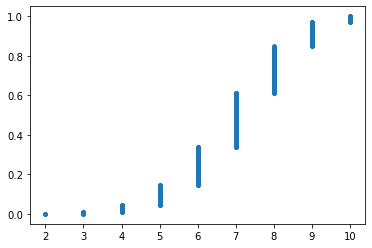

In [14]:
x_flip, y_flip = ecdf(x, plot=True)

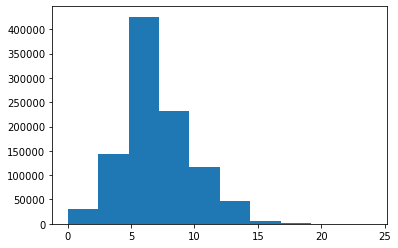

In [15]:
#Generate poisson distribution
samples = np.random.poisson(7, 10**6) #bus arrives on average every 7 times

#plot hist
plt.hist(samples, 10);

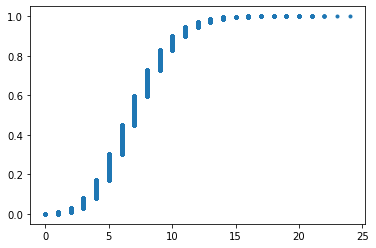

In [16]:
#Check ecdf
_, _ = ecdf(samples, plot=True)

## Bayesian classification for drug user

Assume there is a test that predict drug user with $99\%$ accuracy for positive and $99\%$ accuracy for negative.

it predicts  $p(\text{drug user} | \text{positive}) = 0.99$, and $p(\text{non drug user} | \text{negative}) = 0.99$

now question is how it works for $p(\text{positive} | \text{drug user})=?$ and $p(\text{negative} | \text{non drug user}) = ?$

Let's build a sample for it and 

In [17]:
#sampling size
n = 10_000
#missing information is how many percentage of society is drug user p(drug user) = ?
#let's assume it is 0.5%
p_drug_user = 0.005
#sampling for sample size
users = np.random.binomial(n, p_drug_user)
non_users = n - users

In [18]:
# tested positive and user
u_pos = np.random.binomial(users, 0.99)

#tested negative and non drug user
non_pos = np.random.binomial(non_users, 0.01)

accuracy of model is $\Large\frac{ \text{true pos}}{ \text{true pos + false neg}}$

In [19]:
f' accuracy of model is {u_pos / (u_pos + non_pos)}'

' accuracy of model is 0.31097560975609756'

Here is where the importance of Bayesian rule comes handy

$P(A|B) = \large\frac{P(B|A) P(A)}{P(B)}$

### Bayesian modeling

#### Bayesian Inference and Parameter Estimation

Bayesian Rule from Joint Probability is extracted as:
    
$P(A,B) = P(A \cap B) = P(A|B) P(B) = P(B|A)P(A) = P(B \cap A)$

Which implies:

$P(A|B) P(B) = P(B|A)P(A)$

and consequently:

$P(A|B) = \large \frac{P(B|A)P(A)}{P(B)}$



In [20]:
#!pip3 install janitor
#!pip3 install ConfigParser

In [21]:
import pymc3 as pm;
from ipywidgets import interact
import arviz as az
import pandas as pd
#import janitor
#from utils import ECDF
#import holoviews as hv
#import hvplot.pandas


C:\Users\ali_m\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ali_m\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [22]:
ctr = pd.read_csv('data/clickthrough.csv', index_col = 0)
ctr.sample(5)

,group,clicks
2165,test,0
407,control,0
583,control,1
1007,control,0
1499,control,0


In [23]:
ctr.groupby("group").mean()

,clicks
group,
control,0.14050
test,0.19125


In [24]:
control_df = ctr.query("group = = 'control'")

In [25]:
with pm.Model() as model1_bernoulli:
    p = pm.Uniform("p", lower=0, upper=1)
    like = pm.Bernoulli("likelihood", p=p, observed=control_df['clicks'])